# Pandas Data Wrangling Demo

This notebook demonstrates various pandas operations and data wrangling techniques, structured to match the LIVE DEMO sections from the lecture.

## 1. Basic Pandas Operations and Data Structures

In this section, we'll cover the fundamental pandas data structures (Series and DataFrame) and basic operations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Added import for plotting

# Create a Series
s = pd.Series([1, 3, 5, np.nan, 6, 8])
display("Series:")
display(s)

# Create a DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': ['p', 'q', 'r']
})
display("DataFrame:")
display(df)

# Basic operations
display("Select column 'A':")
display(df['A'])

display("Filter rows where A > 1:")
display(df[df['A'] > 1])

# Add a new column
df['D'] = df['A'] * 2
display("DataFrame with new column 'D':")
display(df)

# Handle missing data
df.loc[1, 'B'] = np.nan
display("Fill missing values with mean:")
display(df['B'].fillna(df['B'].mean()))

# Convert data types
df['C'] = df['C'].astype('category')
display("Data types:")
display(df.dtypes)

'Series:'

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

'DataFrame:'

,A,B,C
0,1,4,p
1,2,5,q
2,3,6,r


"Select column 'A':"

0    1
1    2
2    3
Name: A, dtype: int64

'Filter rows where A > 1:'

,A,B,C
1,2,5,q
2,3,6,r


"DataFrame with new column 'D':"

,A,B,C,D
0,1,4,p,2
1,2,5,q,4
2,3,6,r,6


'Fill missing values with mean:'

0    4.0
1    5.0
2    6.0
Name: B, dtype: float64

'Data types:'

A       int64
B     float64
C    category
D       int64
dtype: object

## 2. Combining and Reshaping Data

In [2]:
# Create two DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1'], 'B': ['B0', 'B1']})
df2 = pd.DataFrame({'A': ['A2', 'A3'], 'B': ['B2', 'B3']})

# Concatenate DataFrames
result = pd.concat([df1, df2])
display("Concatenated DataFrame:")
display(result)

# Merge DataFrames
left = pd.DataFrame({'key': ['K0', 'K1'], 'A': ['A0', 'A1']})
right = pd.DataFrame({'key': ['K0', 'K2'], 'B': ['B0', 'B2']})
merged = pd.merge(left, right, on='key', how='outer')
display("Merged DataFrame:")
display(merged)

# Reshape data: Melt
df = pd.DataFrame({'A': ['a', 'b'], 'B': [1, 3], 'C': [2, 4]})
melted = pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])
display("Melted DataFrame:")
display(melted)

# Reshape data: Pivot
pivoted = melted.pivot(index='A', columns='variable', values='value')
display("Pivoted DataFrame:")
display(pivoted)

'Concatenated DataFrame:'

,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


'Merged DataFrame:'

,key,A,B
0,K0,A0,B0
1,K1,A1,NaN
2,K2,NaN,B2


'Melted DataFrame:'

,A,variable,value
0,a,B,1
1,b,B,3
2,a,C,2
3,b,C,4


'Pivoted DataFrame:'

variable,B,C
A,,
a,1,2
b,3,4


## 3. Data Cleaning Techniques

In [3]:
# Create a DataFrame with issues
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, 6, 7, np.nan, 9],
    'C': ['a', 'b', 'a', 'c', 'b'],
    'D': pd.date_range(start='2023-01-01', periods=5)
})

# Handle missing data
display("Original DataFrame:")
display(df)

display("Dropping rows with missing values:")
display(df.dropna())


'Original DataFrame:'

,A,B,C,D
0,1.0,5.0,a,2023-01-01
1,2.0,6.0,b,2023-01-02
2,NaN,7.0,a,2023-01-03
3,4.0,NaN,c,2023-01-04
4,5.0,9.0,b,2023-01-05


'Dropping rows with missing values:'

,A,B,C,D
0,1.0,5.0,a,2023-01-01
1,2.0,6.0,b,2023-01-02
4,5.0,9.0,b,2023-01-05


In [4]:

# Remove duplicates
display("Original DataFrame:")
display(df)
# Add a duplicate row
df = pd.concat([df, df.iloc[[0]]], ignore_index=True)
display("Removing duplicates:")
display(df.drop_duplicates())


'Original DataFrame:'

,A,B,C,D
0,1.0,5.0,a,2023-01-01
1,2.0,6.0,b,2023-01-02
2,NaN,7.0,a,2023-01-03
3,4.0,NaN,c,2023-01-04
4,5.0,9.0,b,2023-01-05


'Removing duplicates:'

,A,B,C,D
0,1.0,5.0,a,2023-01-01
1,2.0,6.0,b,2023-01-02
2,NaN,7.0,a,2023-01-03
3,4.0,NaN,c,2023-01-04
4,5.0,9.0,b,2023-01-05


In [5]:
display("Original DataFrame:")
display(df)
# String operations
df['C'] = df['C'].str.upper()
display("After string operation:")
display(df)

'Original DataFrame:'

,A,B,C,D
0,1.0,5.0,a,2023-01-01
1,2.0,6.0,b,2023-01-02
2,NaN,7.0,a,2023-01-03
3,4.0,NaN,c,2023-01-04
4,5.0,9.0,b,2023-01-05
5,1.0,5.0,a,2023-01-01


'After string operation:'

,A,B,C,D
0,1.0,5.0,A,2023-01-01
1,2.0,6.0,B,2023-01-02
2,NaN,7.0,A,2023-01-03
3,4.0,NaN,C,2023-01-04
4,5.0,9.0,B,2023-01-05
5,1.0,5.0,A,2023-01-01


In [6]:
display("Original DataFrame:")
display(df)

# String operations
df['C'] = df['C'].str.upper()
display("After string operation:")
display(df)


'Original DataFrame:'

,A,B,C,D
0,1.0,5.0,A,2023-01-01
1,2.0,6.0,B,2023-01-02
2,NaN,7.0,A,2023-01-03
3,4.0,NaN,C,2023-01-04
4,5.0,9.0,B,2023-01-05
5,1.0,5.0,A,2023-01-01


'After string operation:'

,A,B,C,D
0,1.0,5.0,A,2023-01-01
1,2.0,6.0,B,2023-01-02
2,NaN,7.0,A,2023-01-03
3,4.0,NaN,C,2023-01-04
4,5.0,9.0,B,2023-01-05
5,1.0,5.0,A,2023-01-01


In [7]:
display("Original DataFrame:")
display(df)

# Date operations
df['Year'] = df['D'].dt.year
display("After extracting year:")
display(df)

'Original DataFrame:'

,A,B,C,D
0,1.0,5.0,A,2023-01-01
1,2.0,6.0,B,2023-01-02
2,NaN,7.0,A,2023-01-03
3,4.0,NaN,C,2023-01-04
4,5.0,9.0,B,2023-01-05
5,1.0,5.0,A,2023-01-01


'After extracting year:'

,A,B,C,D,Year
0,1.0,5.0,A,2023-01-01,2023
1,2.0,6.0,B,2023-01-02,2023
2,NaN,7.0,A,2023-01-03,2023
3,4.0,NaN,C,2023-01-04,2023
4,5.0,9.0,B,2023-01-05,2023
5,1.0,5.0,A,2023-01-01,2023


In [8]:
display("Original DataFrame:")
display(df)

# Categorical data
df['C'] = df['C'].astype('category')
display("Data types after conversion:")
display(df.dtypes)

'Original DataFrame:'

,A,B,C,D,Year
0,1.0,5.0,A,2023-01-01,2023
1,2.0,6.0,B,2023-01-02,2023
2,NaN,7.0,A,2023-01-03,2023
3,4.0,NaN,C,2023-01-04,2023
4,5.0,9.0,B,2023-01-05,2023
5,1.0,5.0,A,2023-01-01,2023


'Data types after conversion:'

A              float64
B              float64
C             category
D       datetime64[ns]
Year             int32
dtype: object

## 4. Advanced Data Wrangling Techniques

In [9]:
# Custom function application
def celsius_to_fahrenheit(celsius):
    return (celsius * 9/5) + 32

df = pd.DataFrame({'Celsius': [0, 10, 20, 30]})
df['Fahrenheit'] = df['Celsius'].apply(celsius_to_fahrenheit)
display("Applying custom function:")
display(df)


'Applying custom function:'

,Celsius,Fahrenheit
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0


In [10]:

# Pivot table
df = pd.DataFrame({
    'A': ['foo', 'foo', 'bar', 'baz'],
    'B': ['alpha', 'beta', 'alpha', 'beta'],
    'C': [1, 2, 3, 4]
})
display("Original DataFrame:")
display(df)

# Create pivot with sum of values
pivot = df.pivot_table(values='C', index='A', columns='B', aggfunc='sum')
#pivot = df.pivot_table(values='C', index='A', columns='B', aggfunc='sum')
display("Pivot table:")
display(pivot)


'Original DataFrame:'

,A,B,C
0,foo,alpha,1
1,foo,beta,2
2,bar,alpha,3
3,baz,beta,4


'Pivot table:'

B,alpha,beta
A,,
bar,3.0,NaN
baz,NaN,4.0
foo,1.0,2.0


In [11]:

# Data validation
valid_categories = ['foo', 'bar']
display("Valid categories:")
display(valid_categories)
df['is_valid'] = df['A'].isin(valid_categories)
display("After data validation:")
display(df)


'Valid categories:'

['foo', 'bar']

'After data validation:'

,A,B,C,is_valid
0,foo,alpha,1,True
1,foo,beta,2,True
2,bar,alpha,3,True
3,baz,beta,4,False


In [12]:
# DataFrame with random ints 0-20
df = pd.DataFrame(np.random.randint(0, 20, size=(10, 1)), columns=['value'])
display("Original DataFrame:")
display(df)

# Binning data
df['bin'] = pd.cut(df['value'], bins=[0, 5, 15, 20], labels=['low', 'medium', 'high'])
display("After binning:")
display(df)

# Count bins
display("Count of bins:")
display(df['bin'].value_counts())

'Original DataFrame:'

,value
0,3
1,12
2,11
3,18
4,18
5,9
6,5
7,1
8,18
9,17


'After binning:'

,value,bin
0,3,low
1,12,medium
2,11,medium
3,18,high
4,18,high
5,9,medium
6,5,low
7,1,low
8,18,high
9,17,high


'Count of bins:'

bin
high      4
low       3
medium    3
Name: count, dtype: int64

## 5. Quick Data Visualization with pandas

<Axes: title={'center': 'Line Plot'}>

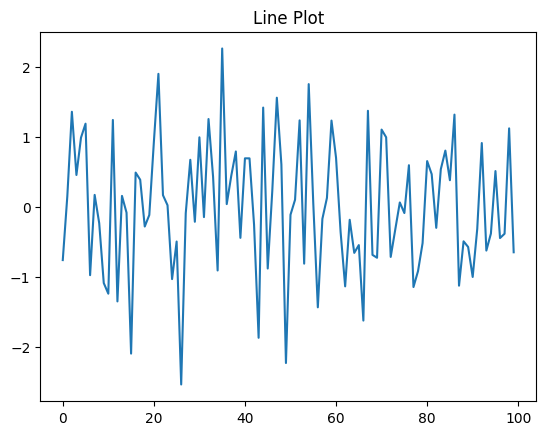

In [13]:
# Basic plotting
df = pd.DataFrame({'A': np.random.randn(100), 'B': np.random.randn(100)})
df['A'].plot(kind='line', title='Line Plot')

<Axes: >

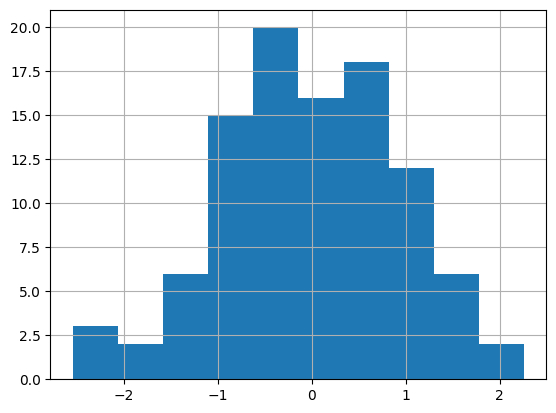

In [14]:
df['A'].hist()

<Axes: >

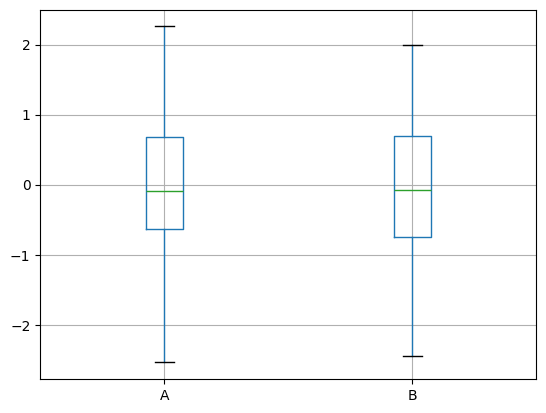

In [15]:
df.boxplot(column=['A', 'B'])

## 6. Advanced Plotting with Seaborn

Seaborn is a statistical data visualization library built on top of matplotlib. Seaborn provides advanced plotting capabilities to visualize relationships between variables.

<Axes: xlabel='A', ylabel='B'>

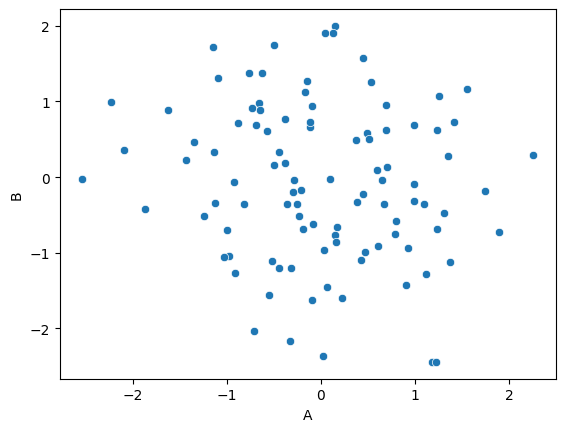

In [16]:
import seaborn as sns

# Scatter plot
sns.scatterplot(x='A', y='B', data=df)


<Axes: >

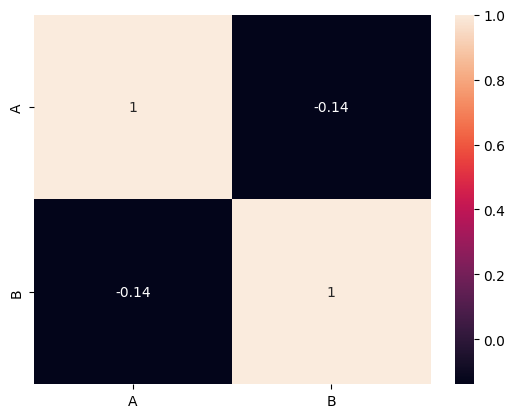

In [17]:

# Correlation heatmap
sns.heatmap(df.corr(), annot=True)



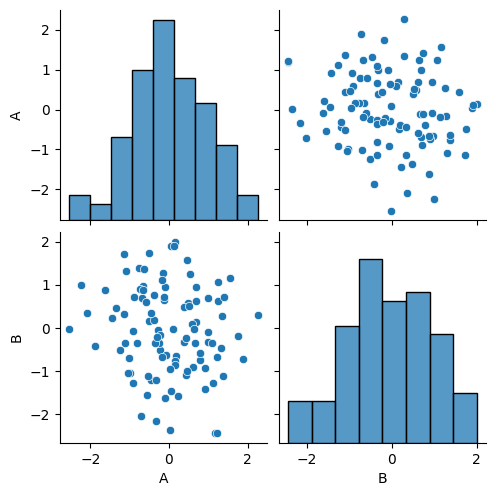

In [18]:
# Pair plot
sns.pairplot(df)